# Probability Distributions
This notebook covers foundational probability distributions and how some of them are interrelated. Each section introduces the distribution, gives its key properties, and provides plots with code and insights.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Common tility to plot distributions
def plot_distribution(x, y, title, xlabel='x', ylabel='Probability'):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


# 1. Bernoulli Distribution

- **Use Case**: Single binary trial (success/failure).
- **PMF**: $P(X=1) = p, \quad P(X=0) = 1-p$
- **Mean**: $\mathbb{E}[X] = p$
- **Variance**: $\mathrm{Var}(X) = p(1-p)$

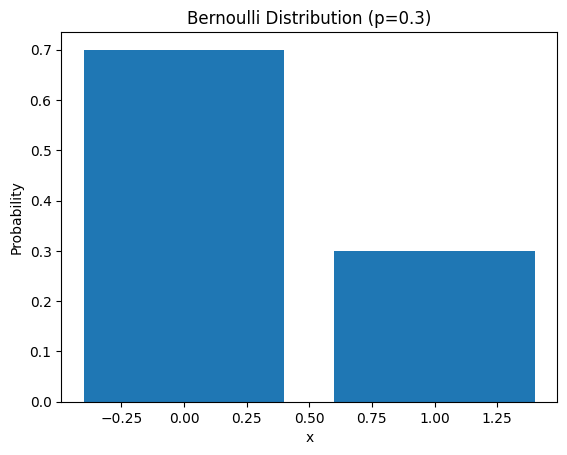

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

p = 0.3
x = [0, 1]
y = bernoulli.pmf(x, p)

plt.bar(x, y)
plt.title(f"Bernoulli Distribution (p={p})")
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

**➡️ Leads to:** Binomial distribution (sum of independent Bernoulli trials)


# 2. Binomial Distribution

- **Use Case**: Number of successes in n independent Bernoulli trials.
- **PMF**: $P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$
- **Mean**: $np$
- **Variance**: $np(1-p)$

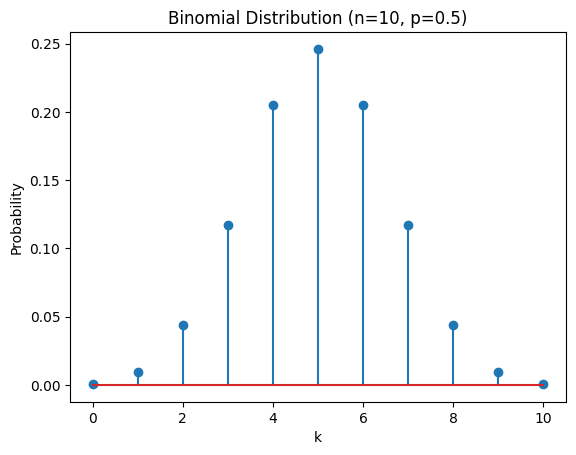

In [14]:
from scipy.stats import binom

n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.stem(x, y)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("k")
plt.ylabel("Probability")
plt.show()

**➡️ Approximates:** Normal distribution as n increases (Central Limit Theorem)


# 3. Normal Distribution (Gaussian)

- **Use Case**: Models continuous data; many natural phenomena.
- **PDF**: $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$
- **Mean**: $\mu$
- **Variance**: $\sigma^2$

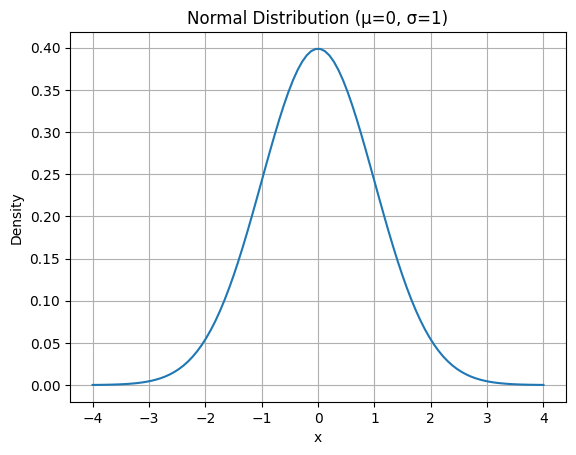

In [17]:
from scipy.stats import norm

mu, sigma = 0, 1
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

**⬅️ Approximates:** Binomial when n is large

**➡️ Related to:** Chi-squared (sum of squared standard normal variables)

# 4. Poisson Distribution
- **Use Case**: Counts of events in a fixed interval of time or space.
- **PMF**: $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$
- **Mean/Variance**: $\lambda$

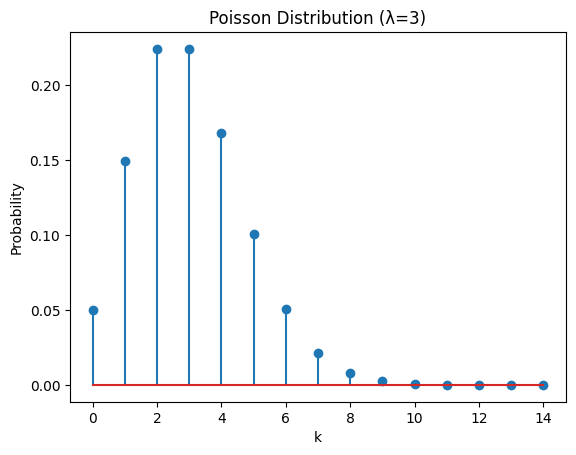

In [19]:
from scipy.stats import poisson

lam = 3
x = np.arange(0, 15)
y = poisson.pmf(x, lam)

plt.stem(x, y)
plt.title(f"Poisson Distribution (λ={lam})")
plt.xlabel("k")
plt.ylabel("Probability")
plt.show()

**➡️ Approximates:** Binomial when n→∞, p→0, np=λ

# 5. Geometric Distribution
- **Use Case**: Number of trials until first success.
- **PMF**: $P(X=k) = (1-p)^{k-1} p$
- **Mean**: $1/p$
- **Variance**: $(1-p)/p^2$

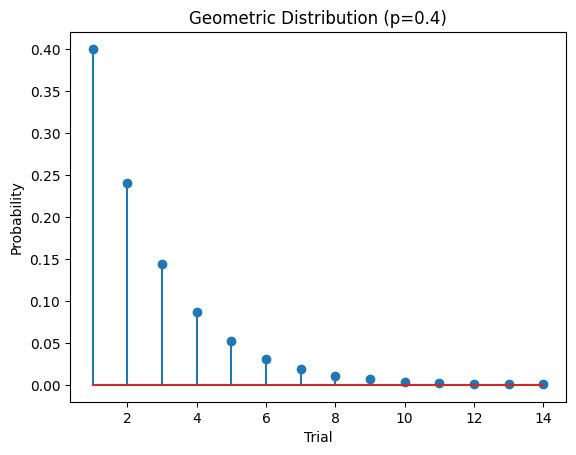

In [20]:
from scipy.stats import geom

p = 0.4
x = np.arange(1, 15)
y = geom.pmf(x, p)

plt.stem(x, y)
plt.title(f"Geometric Distribution (p={p})")
plt.xlabel("Trial")
plt.ylabel("Probability")
plt.show()

**➡️ Related to:** Exponential distribution (continuous counterpart)


# 6. Exponential Distribution
- **Use Case**: Time between events in a Poisson process.
- **PDF**: $f(x) = \lambda e^{-\lambda x}$
- **Mean**: $1/\lambda$
- **Variance**: $1/\lambda^2$

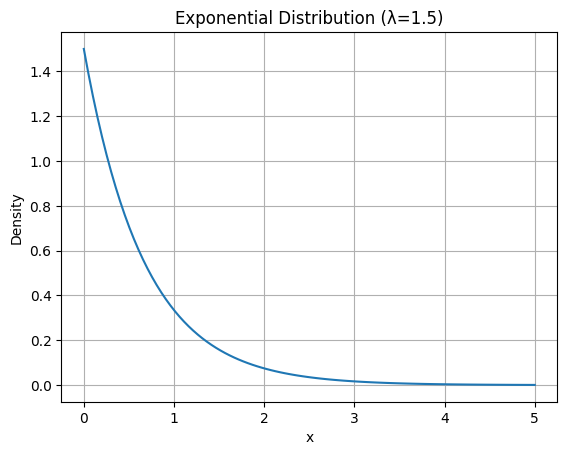

In [23]:
from scipy.stats import expon

lam = 1.5
x = np.linspace(0, 5, 100)
y = expon.pdf(x, scale=1/lam)

plt.plot(x, y)
plt.title(f"Exponential Distribution (λ={lam})")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

**⬅️ Related to:** Geometric (discrete version)

**➡️ Component of:** Gamma distribution

# 7. Gamma Distribution
- **Use Case**: Waiting time until k-th event in a Poisson process.
- **PDF**: $f(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-x/\theta}$
- **Mean**: $k\theta$
- **Variance**: $k\theta^2$

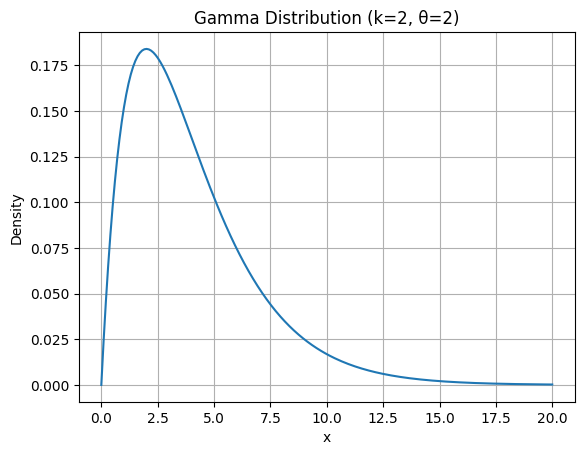

In [25]:
from scipy.stats import gamma

k, theta = 2, 2
x = np.linspace(0, 20, 200)
y = gamma.pdf(x, a=k, scale=theta)

plt.plot(x, y)
plt.title(f"Gamma Distribution (k={k}, θ={theta})")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

**➡️ Leads to:** Chi-squared (when k = ν/2 and θ = 2)

# 8. Chi-Squared Distribution
- **Use Case**: Sum of squares of k standard normal variables.
- **PDF**: $f(x) = \frac{1}{2^{k/2}\Gamma(k/2)} x^{k/2 - 1} e^{-x/2}$
- **Mean**: $k$
- **Variance**: $2k$

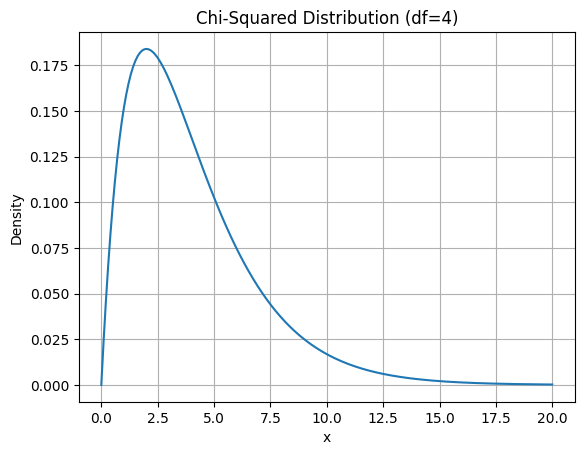

In [26]:
from scipy.stats import chi2

df = 4
x = np.linspace(0, 20, 200)
y = chi2.pdf(x, df)

plt.plot(x, y)
plt.title(f"Chi-Squared Distribution (df={df})")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# Summary (Chain of Relationships)
```
Bernoulli --> Binomial --> Normal
             |            |
             --> Poisson  --> Chi-Squared
Geom --> Exponential --> Gamma --> Chi-Squared
```
